# Spatial data with Python Tutorial

### Virtual environments in Anaconda Python

Fist off all, as may of you may now, a lot of libraries have certain restrictions and conflicts between them. For that reason is a good to create *Virtual Environments* (`virtualenvs`). This environments allow packages to run in a "controled" environments (i.e. only with the specified packages and Python versions). Before open a Jupyter Notebook, you can run in your terminal, we are going to create a new virtual environment: 

`$ conda create <name of environment> python=<python version> <packages>`

- If you leave the packages flag blank, conda is going to create a pretty simple environment with the desired version of python and some basic libraries (like pip).

- The usual Python versions are 2.7 and 3.5. Some packages are more stable in older versions.

- You can check out you available `virtualenvs` by running: `$ conda info -e`. Also you can delete a `virtualenv` by using: `$ conda delete <name of the environment> --all`

Now that you have a new environment you can run things on it using: `$ source activate <name of environment>`. The shell now have a new head. To exit the environment you run: `$ source deactivate` 




### Let's get started with Spatial! 

There are several packages/libraries in Python to read/write and explore spatial data. This Notebook will use `fiona` in conjunction with `geopandas`. You can first install this libraries using: `$ conda -c conda-forge install geopandas fiona`. Now you can open a new Notebook inside the `virtualenv`. 

In [269]:
import os
import pandas as pd
import geopandas as gpd
import fiona

We can open shapefiles (.shp) using the following commands. `Geopandas` will allow us to visualize the geometries and its atributes inside a Pandas DataFrame (in this case is called `geodataframe`). As is, you can filter, select and manage it as any DF (is like R!).

In [491]:
#Open a shapefile in from file
colombian_mpios = gpd.read_file("mpio_colombia/mpio.shp")
print(type(colombian_mpios))

#Explore atributes
colombian_mpios.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,AREA,CLASEMUN,DPTO,HECTARES,MPIO,MPIOS,NOMBRE_CAB,NOMBRE_DPT,NOMBRE_MPI,OF_REG,PERIMETER,REG_ZONAS,WCOLGEN021,WCOLGEN02_,ZONA,geometry
0,7.516766e+09,CM,44,751676.579,847,44847,URIBIA,LA GUAJIRA,URIBIA,DABAR,475636.130236,DABARZONA06,566,2,ZONA06,"POLYGON ((1290154.98018801 1796649.424862138, ..."
1,1.624663e+09,CM,44,162466.283,560,44560,MANAURE,LA GUAJIRA,MANAURE,DABAR,195961.387498,DABARZONA06,564,5,ZONA06,"POLYGON ((1187687.338691119 1800431.819998237,..."
2,1.779934e+09,CM,44,177993.385,430,44430,MAICAO,LA GUAJIRA,MAICAO,DABAR,272174.538806,DABARZONA06,563,6,ZONA06,"POLYGON ((1198031.055217186 1767210.475643945,..."
3,3.109950e+09,CM,44,310995.043,001,44001,RIOHACHA,LA GUAJIRA,RIOHACHA,DABAR,267346.564817,DABARZONA06,559,7,ZONA06,"POLYGON ((1156062.701683688 1755981.215984707,..."
4,1.999866e+09,CM,44,199986.641,090,44090,DIBULLA,LA GUAJIRA,DIBULLA,DABAR,198794.872346,DABARZONA06,1052,8,ZONA06,"POLYGON ((1095571.712708517 1750924.09566785, ..."


There is some other atributes that we can explore and change from this spatial data: 

- Proyection (CRS and PROJ4)
- Area 
- Type of geometry (Line, point, polygon)
- Bound box (know also as bbox)

`Geopandas` has lots of functions to explore these atributes. Let's explore a little more:

In [434]:
#Projection
print(colombian_mpios.crs, colombian_mpios.geom_type.unique())

{'proj': 'tmerc', 'lon_0': -74.08091666666667, 'k': 1, 'lat_0': 4.599047222222222, 'ellps': 'intl', 'y_0': 1000000, 'units': 'm', 'x_0': 1000000, 'no_defs': True} ['Polygon']


In [492]:
#Try the other ones! 
print(colombian_mpios.area)

0       7.516766e+09
1       1.624663e+09
2       1.779934e+09
3       3.109950e+09
4       1.999866e+09
5       2.367555e+09
6       2.385785e+08
7       1.023485e+09
8       1.010396e+09
9       1.223939e+08
10      9.479142e+08
11      8.493239e+07
12      3.669887e+08
13      3.828845e+08
14      1.407790e+09
15      6.293110e+08
16      1.582099e+08
17      1.018462e+08
18      5.069712e+07
19      1.071043e+08
20      1.842958e+08
21      3.781253e+09
22      1.721647e+09
23      1.342359e+08
24      3.185297e+07
25      7.280434e+07
26      2.437687e+08
27      9.392887e+07
28      9.186367e+07
29      6.115086e+07
            ...     
1092    8.719824e+08
1093    5.587396e+08
1094    4.518630e+09
1095    9.567965e+09
1096    2.117989e+09
1097    1.268937e+10
1098    7.329386e+09
1099    1.435832e+08
1100    1.170051e+08
1101    1.109668e+08
1102    7.343091e+07
1103    3.676380e+08
1104    3.118373e+07
1105    5.837940e+08
1106    7.150239e+08
1107    3.188990e+08
1108    1.612

Are this areas valid? What do you think is wrong with them? Remember that projections are different forms or making the world flat. They have diferent units of measure and you have to be careful before making spatial calculations (i.e. measuring euclidean distances or areas). "EPSG" is associated with a PROJ4 string which contains important information about the projection: 

<br><center>`Proj4js.defs["EPSG:4326"] = "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs";`</center><br>

This projection `+ellps=WGS84` is commonly known as Mercator and is commonly used with point data and GPS's that use longitude and latitude in degrees. As you can see, it does not have any units. We will learn how to reproject this polygon data and calculate valid areas in meters. 

In [493]:
colombian_mpios = colombian_mpios.to_crs(epsg=4326)

### Point data (in .csv)
We can also have data in different formats. For instance, most of the administrative geographical data is stored in shapefiles, but some events can be also be stored in flat text files or .csv's. Python can also manage this kind of data. We will explore data from landmines in Colombia from 2000 to 2015. 

In [494]:
#Open the .csv file as normal with Pandas (be careful with encoding, this is Spanish!)
landmines = pd.read_csv("landmines.csv", encoding="utf-8", sep=";", index_col=None, decimal=",")
landmines.head()

#What info do I have here? Look that this data is geo-referenced: latitude + longitude!
print(landmines.columns.values)

['Tipo de evento' 'Departamento' 'Municipio' 'Sitio' 'Fecha del accidente'
 'Año' 'Mes' 'Evento' 'Coordenadas tomadas con' 'latitude' 'longitude'
 'COD_DANE_MUNI' 'COD_DANE_DEPTO' 'Tipo de lugar'
 'Presunto actor responsable' 'Descripcion' 'Tipo de area'
 'ID_IMSMA Evento' 'Estatus' 'accident_guid' 'Civil' 'Fuerza pública']


We have read the data as a normal `pandas` DataFrame, but now we need to tell Python that we want to explore the spatial features of the data. For this, we will have first to create a points geometry object that will have all the combinations of: `(longitude, latitude)`. Then we will "merge" this object with an atribute table. 

In [495]:
import shapely as sp

geo_points = [sp.geometry.Point(xy) for xy in zip(landmines.longitude, landmines.latitude)]
landmines = landmines.drop(['longitude', 'latitude'], axis=1)
#crs = {'init': 'epsg:4326'}
landmines_geo = gpd.GeoDataFrame(landmines, crs=crs, geometry = geo_points)
landmines_geo = landmines_geo.to_crs(epsg=4326)

print(type(landmines_geo))


<class 'geopandas.geodataframe.GeoDataFrame'>


### Maps and subsetting 

Python has great mapping capabilities (although it can be a little slow at times). One easy way to run plots using this Notekooks is using `matplotlib` in-line graphics capabilities. We can plot our spatial polygon data: 

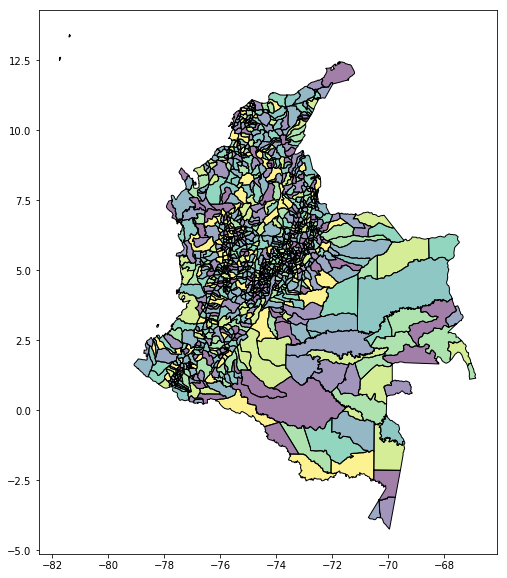

In [496]:
import matplotlib.pyplot as plt
colombian_mpios.plot(figsize = (10, 10))

plt.show()

### <center> Now we have a map! </center> 
Yes, it has colors, `plot` method will always select a column to color the map, you can modify this behavior using the `ax` option or defining a color for the map (`color = <insert color>`). More information about options can be consulted in `matplotlib` help. 

The good about `Geopandas`is that as a normal `pandas` dataframe, it can be sliced and filtered. Let's try to select only one of the Colombian states (departmentos):

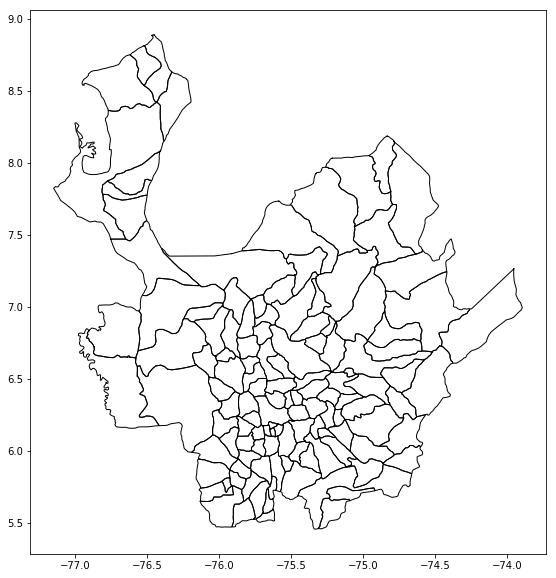

In [497]:
# If we want to remember which atributes does the geometry has, we can run: print(colombian_mpios.columns.values)
# or colombian_mpios.head()
antioquia = colombian_mpios[colombian_mpios["NOMBRE_DPT"] == "ANTIOQUIA"]
antioquia.plot(figsize = (10, 10), color="white")
plt.show()

### Atribute creation and Spatial calculations

What about creating new atributes? This can be done in the same fashion that with a normal `DataFrame` object. Go back to our landmine data and explore how landmines are distributed in Antioquia. For that we are going to first create a map with layers, and second, a new atribute for each of the municipalities of the state (departmento).

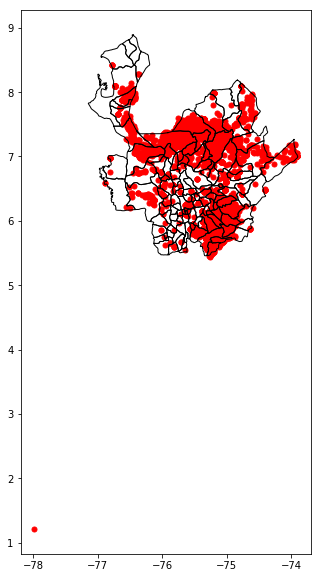

In [498]:
#There is several ways to do this! We can on one hand, subset landmine data to the department and then graph both 
landmines_antioquia = landmines_geo[landmines_geo['Departamento'] == "ANTIOQUIA"]
antioquia.plot(ax = landmines_antioquia.plot(marker='o', color='red', markersize=5, figsize = (10, 10)), figsize = (10, 10), color='white')
plt.show()


As you can see, the points `DataFrame` can also be sliced by the state. Nonetheless, this process can not be sufficient to spatially filter the whole data. For that reason, `shapely` library (working inside `Geopandas`) have different spatial operations, in this case we can use `within` (there is `union`, `intersection`, `difference`, etc.). We can map the result to watch the operation

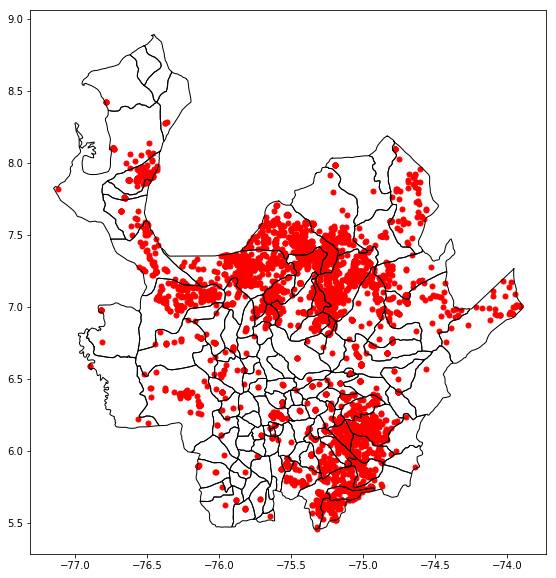

In [621]:
#Spatially filter landmine database only to Antioquia.
landmines_antioquia_within = landmines_geo[landmines_geo.within(antioquia.unary_union)]
antioquia.plot(ax = landmines_antioquia_within.plot(marker='o', color='red', markersize=5, figsize = (10, 10)), figsize = (10, 10), color='white')
plt.show()


One common operation is join atributes of spatial objects. This allows us to `aggregate` data and do other things. One of the main issues when making an spatial join is that sometime spatial objects do not have the same projection. Hence, we have to check that both objects are spatially comparable.  

In [504]:
#For a spatialjoin is important to know if both polygons have the same projection:
print(landmines_antioquia_within.crs == antioquia.crs)

#Now we can create a new object with a merge of features
antioquia_landmines = gpd.sjoin(landmines_antioquia_within, antioquia,  how="inner", op='within')


True


In [507]:
antioquia_landmines.head()

,Tipo de evento,Departamento,Municipio,Sitio,Fecha del accidente,Año,Mes,Evento,Coordenadas tomadas con,COD_DANE_MUNI,...,MPIOS,NOMBRE_CAB,NOMBRE_DPT,NOMBRE_MPI,OF_REG,PERIMETER,REG_ZONAS,WCOLGEN021,WCOLGEN02_,ZONA
1,Accidente por MAP,ANTIOQUIA,ITUANGO,Pela Huevo,21/05/2010 04:00:00 p.m.,2010,5,Accidente,Coordenadas tomadas con GPS,5361,...,05361,ITUANGO,ANTIOQUIA,ITUANGO,DAMED,260855.67471,DAMEDZONA04,351,247,ZONA04
19,Accidente por MAP,ANTIOQUIA,ITUANGO,NaN,23/04/10,2010,4,Accidente,Coordenadas tomadas con GPS,5361,...,05361,ITUANGO,ANTIOQUIA,ITUANGO,DAMED,260855.67471,DAMEDZONA04,351,247,ZONA04
46,Accidente por MAP,ANTIOQUIA,ITUANGO,Vereda Los Monos,27/01/2010 01:30:00 p.m.,2010,1,Accidente,Coordenadas tomadas con GPS,5361,...,05361,ITUANGO,ANTIOQUIA,ITUANGO,DAMED,260855.67471,DAMEDZONA04,351,247,ZONA04
184,Accidente por MAP,ANTIOQUIA,ITUANGO,Vereda Conguital,30/03/2010 01:30:00 p.m.,2010,3,Accidente,Coordenadas tomadas con GPS,5361,...,05361,ITUANGO,ANTIOQUIA,ITUANGO,DAMED,260855.67471,DAMEDZONA04,351,247,ZONA04
191,Accidente por MAP,ANTIOQUIA,ITUANGO,Tagual,24/03/2010 09:15:00 a.m.,2010,3,Accidente,Coordenadas tomadas con GPS,5361,...,05361,ITUANGO,ANTIOQUIA,ITUANGO,DAMED,260855.67471,DAMEDZONA04,351,247,ZONA04


Once you have joined data, you can use the attributes to map or to group attributes by other features. In this case we will count the number of landmines for each of the municipalities of the Antioquia state. This operation is identical to the `pandas` one: `df.groupby(variable of aggregation)` and since that will only return an Series (a vector in R's language), you can use `.transform` comibined with `assign` method to create a new feature inside the DataFrame. 

In [623]:
#Group by landmines by municipality
antioquia = antioquia.assign(count = antioquia_landmines.groupby("Municipio")['Municipio'].transform(len))
antioquia = antioquia.assign(count_area = antioquia["count"]/antioquia["AREA"])
antioquia.head()


,AREA,CLASEMUN,DPTO,HECTARES,MPIO,MPIOS,NOMBRE_CAB,NOMBRE_DPT,NOMBRE_MPI,OF_REG,PERIMETER,REG_ZONAS,WCOLGEN021,WCOLGEN02_,ZONA,geometry,count,count_area
147,5.081038e+08,CM,05,50810.384,051,05051,ARBOLETES,ANTIOQUIA,ARBOLETES,DAMED,132579.245551,DAMEDZONA02,306,151,ZONA02,POLYGON ((-76.45159912109868 8.887299537658606...,60.0,1.180861e-07
155,3.496633e+08,CM,05,34966.327,659,05659,SAN JUAN DE URABA,ANTIOQUIA,SAN JUAN DE URABA,DAMED,83583.695780,DAMEDZONA02,381,159,ZONA02,POLYGON ((-76.52130126953676 8.812000274658088...,NaN,NaN
160,1.292389e+09,CM,05,129238.946,490,05490,NECOCLI,ANTIOQUIA,NECOCLI,DAMED,167152.803608,DAMEDZONA02,363,164,ZONA02,POLYGON ((-76.51999664307186 8.535300254821667...,175.0,1.354081e-07
164,7.164043e+08,CM,05,71640.431,665,05665,SAN PEDRO DE URABA,ANTIOQUIA,SAN PEDRO DE URABA,DAMED,127954.638187,DAMEDZONA02,384,168,ZONA02,POLYGON ((-76.33039855957426 8.633799552917447...,NaN,NaN
177,3.332524e+09,CM,05,333252.377,837,05837,TURBO,ANTIOQUIA,TURBO,DAMED,478772.870184,DAMEDZONA02,399,181,ZONA02,POLYGON ((-76.76950073242963 8.363599777221395...,427.0,1.281311e-07


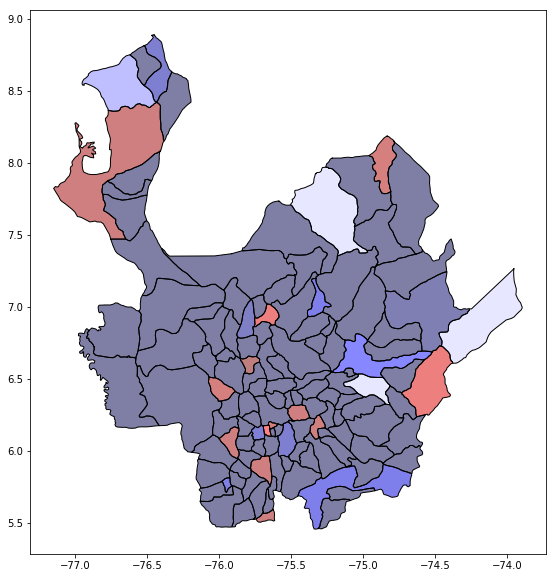

In [550]:
antioquia.plot(figsize = (10, 10), column = "count", cmap="seismic")
plt.show()

### Fancy maping

Python also have libraries for fancy mapping. This is leaflet!

In [553]:
import folium
antioquia.unary_union.centroid.xy

(array('d', [-75.59395944395739]), array('d', [6.916388304354971]))

In [620]:

m = folium.Map(location=[6.916, -75.56], zoom_start=7, 
               tiles="cartodbpositron")

geo_str = antioquia.to_json()

m.choropleth(geo_str = geo_str,
             data = antioquia, columns=['NOMBRE_MPI','AREA'],
             key_on='feature.properties.NOMBRE_MPI',
             fill_color="BuPu")
m